# Package
Import necessary packages.

In [ ]:
import requests
from io import BytesIO
import zipfile
import pandas as pd
import matplotlib.pyplot as plt

## Data
This data provides an updated data series for KPSS values and forward citations, a patent number to the CRSP "permno" match and a patent number to CPC class match following the paper **Kogan, L., Papanikolaou, D., Seru, A. and Stoffman, N., 2017. Technological innovation, resource allocation, and growth. Quarterly Journal of Economics, 132(2), pp. 665-712**. The paper is available at https://academic.oup.com/qje/article/132/2/665/3076284.

### KPSS_2022
Patent level panel data from 1926 to 2022.

| Variable name | Definition                                                              |
| ------------- | ----------------------------------------------------------------------- |
| patent_num    | Patent ID number                                                        |
| permno        | CRSP permno                                                             |
| issue_date    | Issue date of patent (mm/dd/yyyy)                                       |
| filing_date   | Filing date of patent application(mm/dd/yyyy)                           |
| xi_nominal    | Value of innovation(ξ) in millions of nominal dollars                   |
| xi_real       | Value of innovation(ξ) deflated to 1982 (million) dollars using the CPI |
| cites         | Forward citations                                                       |


# Read file from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Match_patent_cpc_2023 = pd.read_csv("/content/drive/MyDrive/DataAnalytics/KPSS/Match_patent_cpc_2023.csv")
Match_patent_cpc_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324963 entries, 0 to 3324962
Data columns (total 2 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   patent_num  int64 
 1   cpc         object
dtypes: int64(1), object(1)
memory usage: 50.7+ MB


In [ ]:
KPSS_2023 = pd.read_csv("/content/drive/MyDrive/DataAnalytics/KPSS/KPSS_2023.csv")
KPSS_2023.info()
KPSS_2023.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3324963 entries, 0 to 3324962
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   patent_num   int64  
 1   permno       int64  
 2   issue_date   int64  
 3   filing_date  float64
 4   xi_nominal   float64
 5   xi_real      float64
 6   cites        int64  
dtypes: float64(3), int64(4)
memory usage: 177.6 MB


,patent_num,permno,issue_date,filing_date,xi_nominal,xi_real,cites
3244437,11582843,81132,20230214,20210928.0,16.962239,5.397021,0
259149,2921800,12503,19600119,19570920.0,0.934197,3.059651,1
1129617,5504540,81854,19960402,19931207.0,0.972870,0.598689,42
1430413,6383065,46690,20020507,20010122.0,12.425293,6.703751,20
1794321,7251887,10145,20070807,20031204.0,11.789192,5.478228,1
1884175,7467317,53613,20081216,20061106.0,1.587973,0.737229,4
1407711,6319493,25013,20011120,20000419.0,128.639898,71.054069,1
1707370,7049226,14702,20060523,20040610.0,10.961163,5.301335,330
157362,2531167,10161,19501121,19460418.0,0.311149,1.214726,18
2037638,7846156,76020,20101207,20060405.0,1.723782,0.767597,29


In [ ]:
#Match_patent_cpc_2023.head(50)
#Match_patent_cpc_2023.tail(50)
Match_patent_cpc_2023.sample(10)


,patent_num,cpc
2305586,8595628,G06Q10/10
241966,2865009,H01P5/04
1698038,7027839,H04W16/28;H01Q1/246
1264229,5906791,C22C38/002;C22C38/22;C22C38/24
806472,4452980,C07D251/16
2821469,10157204,G06F17/30289;G06F17/30463
615627,3928436,NaN
2552269,9304877,G06F11/2007;G06F11/203;G06F2201/85;G06F17/3057...
186413,2655648,G01S13/78;G01S13/765
640599,3993606,C08J2375/04;C08J9/0061;C08G77/388;C08J2483/00


# Read file from CSV file

In [ ]:
cpc = pd.read_csv("/content/drive/MyDrive/DataAnalytics/KPSS/sampled1000_Match_patent_cpc_2022.csv")
patent = pd.read_csv("/content/drive/MyDrive/DataAnalytics/KPSS/sampled1000_KPSS_2022.csv")

In [ ]:
cpc

,patent_num,cpc
0,1578371,B41L13/18
1,1580657,F16D65/062
2,1590632,B41J29/08
3,1663457,A43D21/127;Y10S12/01
4,1685154,Y10T70/7932;E05B27/00;Y10T70/7701;Y10T70/7605
...,...,...
995,11484946,B33Y10/00;G06F2113/10;G05B2219/49007;B33Y70/00...
996,11487819,G06F21/602;H04L9/3239;G06F16/21;G06F9/466;G06F...
997,11499463,F01N2900/1818;F01N2900/1814;F01N2900/1621;F01N...
998,11509766,H04M3/42144;H04M3/42178;H04M3/568


In [ ]:
patent

,patent_num,permno,issue_date,filing_date,xi_nominal,xi_real,cites
0,2826872,22509,19580318,19541101.0,2.980388,10.065255,9
1,5455657,21152,19951003,19921105.0,0.023806,0.015137,6
2,4519872,12490,19850528,19840611.0,15.031772,13.422699,47
3,4458225,11762,19840703,19821118.0,0.788312,0.730667,13
4,8842997,77604,20140923,20110106.0,1.359947,0.565264,5
...,...,...,...,...,...,...,...
995,6322697,61313,20011127,19990719.0,5.962048,3.293129,29
996,2132447,11308,19381011,19350205.0,2.974909,20.739367,40
997,5116157,38333,19920526,19901228.0,3.522090,2.422523,65
998,7279536,11850,20071009,20060825.0,371.432979,172.598311,19


1.How many unique patents are there in the KPSS_2022?

In [ ]:
import pandas as pd

unique_patents = patent['patent_num'].nunique()
print("KPSS_2022 資料中有", unique_patents, "個獨特的專利。")

KPSS_2022 資料中有 1000 個獨特的專利。



2.What is the average (real) value of all patents issued in the year 2005?

In [ ]:
# 將發行日期轉換為字符串，並提取前四個字符來比較
patents_2005 = patent[patent['issue_date'].astype(str).str[:4] == '2005']


# 計算這些專利的實際價值的平均值
average_real_value_2005 = patents_2005['xi_real'].mean()

print("2005年發行的所有專利的平均（實際）價值為:", average_real_value_2005)

2005年發行的所有專利的平均（實際）價值為: 4.874790200579856


3.(i) What is the average number of citations received by patents filed in the years 2001-2005? What is the median number of citations for the same period?

In [ ]:
# 選擇2001年到2005年之間的專利
patents_2001_to_2005 = patent[patent['filing_date'].astype(str).str[:4].astype(int).between(2001, 2005)]

# 計算平均引用數和中位數引用數
average_citations = patents_2001_to_2005['cites'].mean()
median_citations = patents_2001_to_2005['cites'].median()

print("2001年到2005年之間的專利的平均引用數為:", average_citations)
print("2001年到2005年之間的專利的中位數引用數為:", median_citations)

2001年到2005年之間的專利的平均引用數為: 15.968503937007874
2001年到2005年之間的專利的中位數引用數為: 4.0


(ii) Identify the top 10 most cited patents in the sample period. Are any of these patents familiar to you? Use resources such as the USPTO or Google Patents to verify.

In [ ]:
# 按照引用次數降序排序專利
top_10_cited_patents = patent.sort_values(by='cites', ascending=False).head(10)

# 打印前10個專利
print(top_10_cited_patents)

     patent_num  permno  issue_date  filing_date  xi_nominal     xi_real  \
973     5461415   12490    19951024   19940315.0   10.462296    6.652248   
341     5308782   22779    19940503   19921026.0    5.805734    3.785168   
504     4583976   19393    19860422   19840531.0   13.692825   12.094296   
357     6800074   52716    20041005   20020506.0   16.867172    8.650741   
290     5216843   59328    19930608   19920924.0  185.020513  123.854610   
893     9138180   92220    20150922   20110503.0    5.247146    2.165190   
840     6475930   22779    20021105   20000131.0    9.992509    5.391205   
27      5907604   51131    19990525   19970325.0    0.609670    0.353558   
399     6673385   20482    20040106   20010628.0   48.508386   24.878710   
142     6748211   22779    20040608   20020522.0   27.179711   13.939778   

     cites  
973    335  
341    304  
504    293  
357    290  
290    279  
893    265  
840    255  
27     245  
399    218  
142    199  


4.Create a time-series plot with the filing year on the x-axis and the annual number of patents on the y-axis. Overlay this plot with the annual average real value of the patents and the annual number of citations received by each patent. Do you notice any trends? Narrate your observations from this chart.

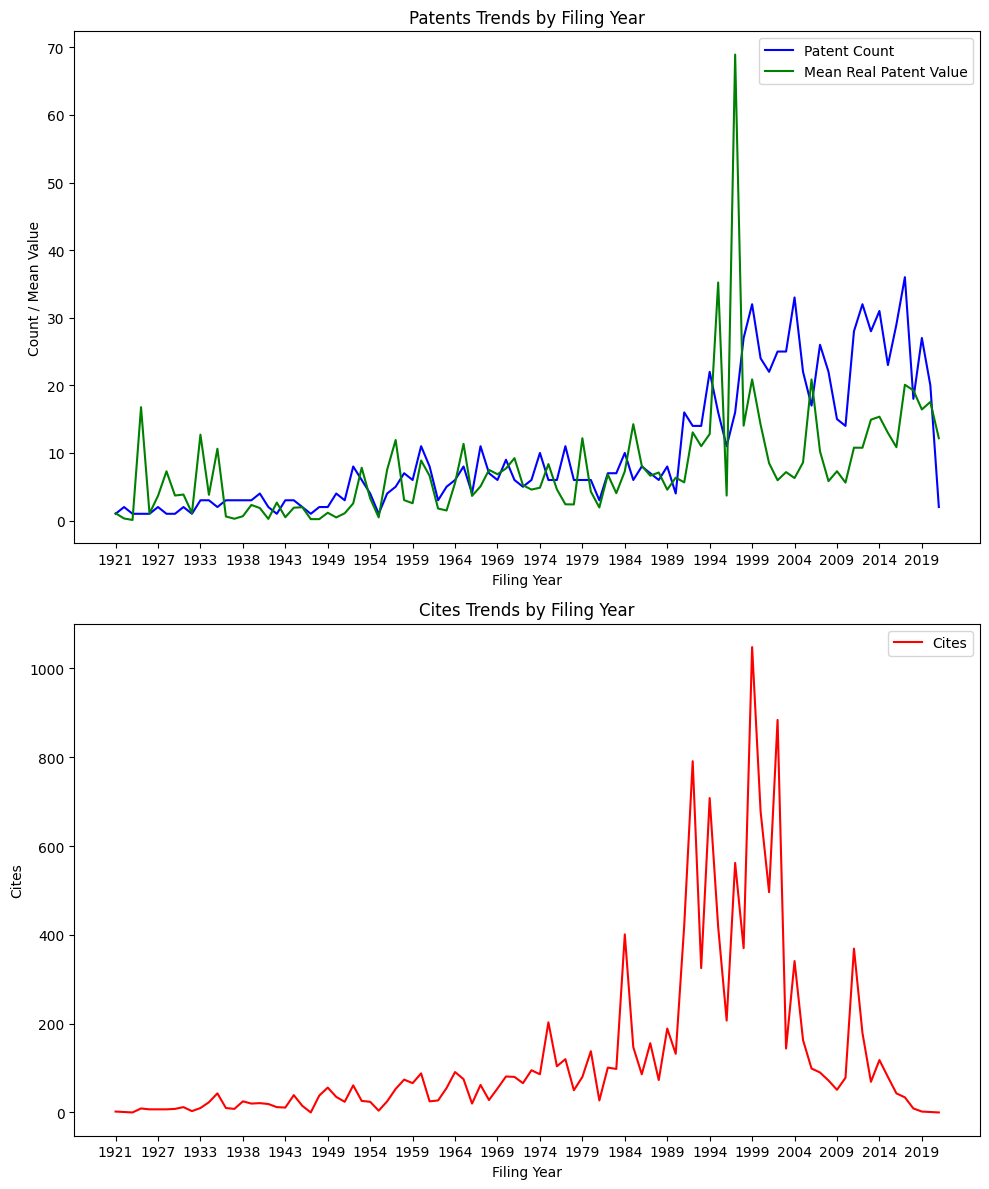

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = patent.copy()
# 按申請年份對數據進行聚合
df['filling_year'] = df['filing_date'].astype(str).str[:4]
annual_data = df.groupby('filling_year').agg({'patent_num': 'count', 'xi_real': 'mean', 'cites': 'sum'}).reset_index()

# 創建一個新的圖形
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 12))

# 繪製第一張子圖（專利數量和平均實際專利價值）
axes[0].plot(annual_data['filling_year'], annual_data['patent_num'], label='Patent Count', color='blue')
axes[0].plot(annual_data['filling_year'], annual_data['xi_real'], label='Mean Real Patent Value', color='green')
axes[0].set_xlabel('Filing Year')
axes[0].set_ylabel('Count / Mean Value')
axes[0].set_title('Patents Trends by Filing Year')
axes[0].legend()

# 設置第一張子圖 x 軸刻度每隔五年一次
axes[0].set_xticks(annual_data['filling_year'][::5])

# 繪製第二張子圖（專利引用數）
axes[1].plot(annual_data['filling_year'], annual_data['cites'], label='Cites', color='red')
axes[1].set_xlabel('Filing Year')
axes[1].set_ylabel('Cites')
axes[1].set_title('Cites Trends by Filing Year')
axes[1].legend()

# 設置第二張子圖 x 軸刻度每隔五年一次
axes[1].set_xticks(annual_data['filling_year'][::5])

# 調整子圖間距
plt.tight_layout()

# 顯示圖表
plt.show()


# Merge


5.Perform a left merge of KPSS_2022 and Match_patent_cpc_2022, keeping all records from KPSS_2022. Check if the total number of patents in the merged dataset is the same as in the unmerged datasets. Why or why not?

In [ ]:
import pandas as pd

cpc = pd.read_csv("/content/drive/MyDrive/DataAnalytics/KPSS/sampled1000_Match_patent_cpc_2022.csv")
kpss = pd.read_csv("/content/drive/MyDrive/DataAnalytics/KPSS/sampled1000_KPSS_2022.csv")

merged_kpss_cpc_left = kpss.merge(cpc, on = 'patent_num', how = 'left')
merged_kpss_cpc_left


,patent_num,permno,issue_date,filing_date,xi_nominal,xi_real,cites,cpc
0,2826872,22509,19580318,19541101.0,2.980388,10.065255,9,B24B9/105
1,5455657,21152,19951003,19921105.0,0.023806,0.015137,6,G03G15/5004;G03G15/043
2,4519872,12490,19850528,19840611.0,15.031772,13.422699,47,H01L21/7688;Y10S438/951;H05K3/048;G03F7/039;H0...
3,4458225,11762,19840703,19821118.0,0.788312,0.730667,13,H01H71/40;H01H9/32
4,8842997,77604,20140923,20110106.0,1.359947,0.565264,5,H04B10/508;H04B10/5561;H04B10/5053;H04B10/5055...
...,...,...,...,...,...,...,...,...
995,6322697,61313,20011127,19990719.0,5.962048,3.293129,29,B01D35/31;B01D29/15;B01D29/23;B01D2201/307;B01...
996,2132447,11308,19381011,19350205.0,2.974909,20.739367,40,G01N21/9027
997,5116157,38333,19920526,19901228.0,3.522090,2.422523,65,B42F13/22
998,7279536,11850,20071009,20060825.0,371.432979,172.598311,19,C08F4/65927;C08F110/06;Y02P20/544;C08F210/06;C...


6.Perform an inner merge of KPSS_2022 and Match_patent_cpc_2022. Check if the total number of patents in the merged dataset is the same as in the unmerged datasets. Why or why not?

In [ ]:
merged_kpss_cpc_inner = kpss.merge(cpc, on = 'patent_num', how = 'inner')
merged_kpss_cpc_inner

,patent_num,permno,issue_date,filing_date,xi_nominal,xi_real,cites,cpc
0,2826872,22509,19580318,19541101.0,2.980388,10.065255,9,B24B9/105
1,5455657,21152,19951003,19921105.0,0.023806,0.015137,6,G03G15/5004;G03G15/043
2,4519872,12490,19850528,19840611.0,15.031772,13.422699,47,H01L21/7688;Y10S438/951;H05K3/048;G03F7/039;H0...
3,4458225,11762,19840703,19821118.0,0.788312,0.730667,13,H01H71/40;H01H9/32
4,8842997,77604,20140923,20110106.0,1.359947,0.565264,5,H04B10/508;H04B10/5561;H04B10/5053;H04B10/5055...
...,...,...,...,...,...,...,...,...
995,6322697,61313,20011127,19990719.0,5.962048,3.293129,29,B01D35/31;B01D29/15;B01D29/23;B01D2201/307;B01...
996,2132447,11308,19381011,19350205.0,2.974909,20.739367,40,G01N21/9027
997,5116157,38333,19920526,19901228.0,3.522090,2.422523,65,B42F13/22
998,7279536,11850,20071009,20060825.0,371.432979,172.598311,19,C08F4/65927;C08F110/06;Y02P20/544;C08F210/06;C...


7.Use a pie chart to display the proportion of patents in each CPC class.

在這些CPC（Cooperative Patent Classification）編碼中，首個英文字母代表了主要的技術領域。CPC編碼是專利文件中用於標識技術主題的一種標準，它是根據專利文件中技術信息的內容和結構進行的分類。以下是首個英文字母的一些可能代表的主要技術領域：

A：人類需要

B：作業、運輸

C：化學、冶金

D：紡織、造紙

E：固定建築物

F：機械工程、照明、加熱、武器、爆破

G：物理學

H：電學

Y：一般或跨領域的專利文件

In [ ]:
cpc['main_class'] = cpc['cpc'].str[0]
cpc_counts = cpc['main_class'].value_counts()
cpc_counts

,count
main_class,
H,278
G,266
B,122
C,114
F,68
A,65
Y,61
E,17
D,9


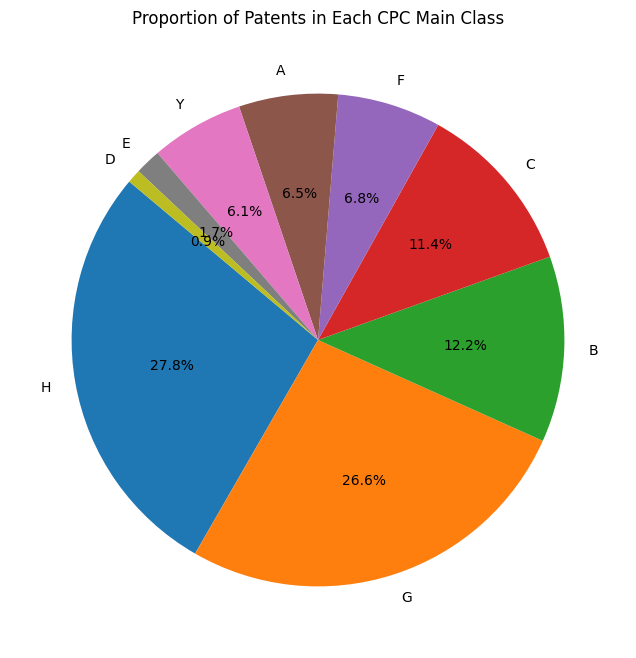

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 假設 'cpc' DataFrame 包含 CPC 類別信息，其中 CPC 類別代碼儲存在 'cpc_class' 列中
# 提取 CPC 類別代碼的第一個字母作為主分類
cpc['main_class'] = cpc['cpc'].str[0]

# 按主分類分組，計算每個主分類中的專利數量
cpc_counts = cpc['main_class'].value_counts()

# 繪製餅圖
plt.figure(figsize=(10, 8))
cpc_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Patents in Each CPC Main Class')
plt.ylabel('')  # 刪除 y 軸標籤，該標籤是列名
plt.show()

8.For each CPC classification, plot a time series with the issuing year on the x-axis and the annual number of patents for each CPC on the y-axis. Describe the trends you observe in the issuance of patents across different CPC classifications.

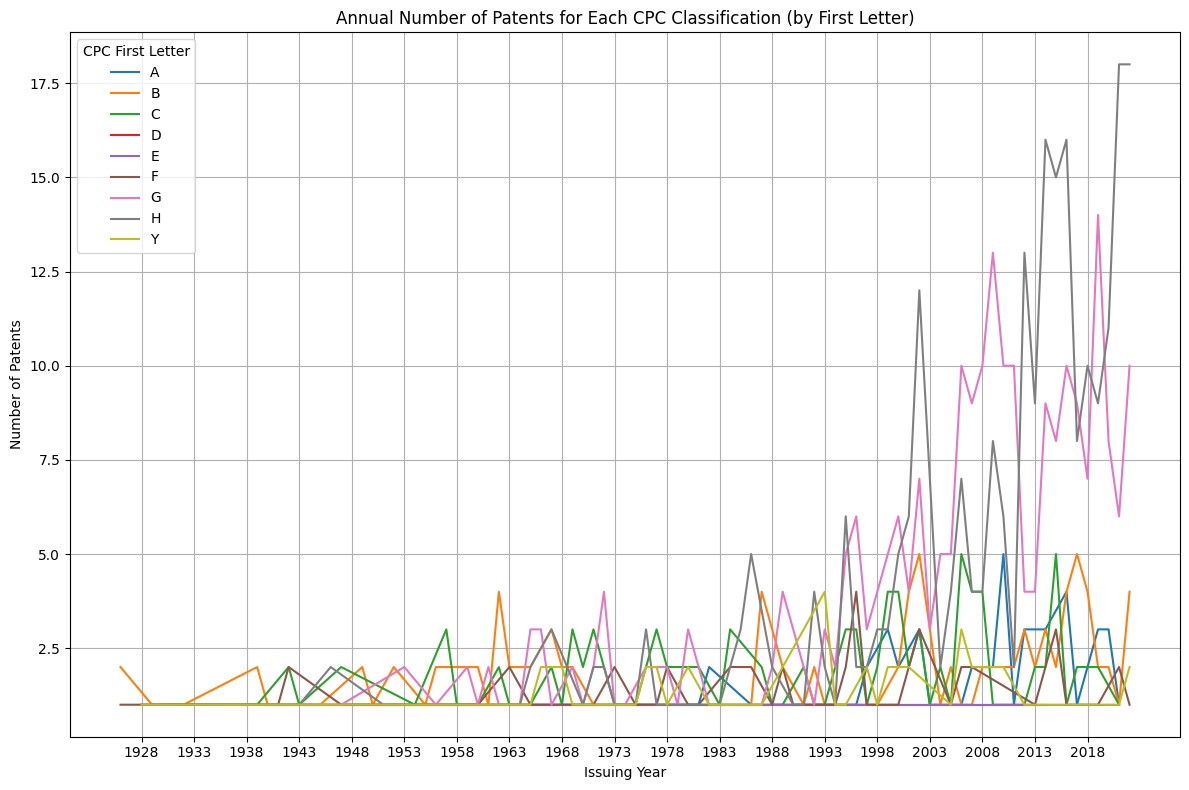

In [ ]:

# 合併數據
merged_kpss_cpc_inner = kpss.merge(cpc, on='patent_num', how='inner')

# 提取 CPC 分類的第一個英文字母作為新的分類列
merged_kpss_cpc_inner['cpc_first_letter'] = merged_kpss_cpc_inner['cpc'].str[0]

# 按 CPC 分類的第一個英文字母分組
grouped = merged_kpss_cpc_inner.groupby('cpc_first_letter')

# 創建一個新的圖形
plt.figure(figsize=(12, 8))

for name, group in grouped:
    # 提取 'issue_date' 的前四個數字作為年份
    group['issue_year'] = group['issue_date'].astype(str).str[:4]

    # 按年份分組計算專利數量
    patents_by_year = group.groupby('issue_year').size()

    # 將索引轉換為整數
    patents_by_year.index = patents_by_year.index.astype(int)

    # 繪製折線圖
    plt.plot(patents_by_year.index, patents_by_year.values, label=name)

# 設置 x 軸刻度為每五年一次
plt.xticks(range(patents_by_year.index.min(), patents_by_year.index.max() + 1, 5))

# 添加標籤和標題
plt.xlabel('Issuing Year')
plt.ylabel('Number of Patents')
plt.title('Annual Number of Patents for Each CPC Classification (by First Letter)')
plt.legend(title='CPC First Letter', loc='upper left')

# 顯示圖表
plt.grid(True)
plt.tight_layout()
plt.show()

# Green Patent

In [ ]:
# prompt: identify the CPC with Y02 and Y04S, create a dummy variable

# Assuming 'merged_kpss_cpc_inner' DataFrame from the previous code is available

# Create a dummy variable for CPC classes Y02 and Y04S
merged_kpss_cpc_inner['Y02_Y04S'] = 0
merged_kpss_cpc_inner.loc[merged_kpss_cpc_inner['cpc'].isin(['Y02', 'Y04S']), 'Y02_Y04S'] = 1

# Now, 'Y02_Y04S' column contains 1 for patents with CPC 'Y02' or 'Y04S', and 0 otherwise
print(merged_kpss_cpc_inner[['cpc', 'Y02_Y04S']])


                                                   cpc  Y02_Y04S
0                                            B24B9/105         0
1                               G03G15/5004;G03G15/043         0
2    H01L21/7688;Y10S438/951;H05K3/048;G03F7/039;H0...         0
3                                   H01H71/40;H01H9/32         0
4    H04B10/508;H04B10/5561;H04B10/5053;H04B10/5055...         0
..                                                 ...       ...
995  B01D35/31;B01D29/15;B01D29/23;B01D2201/307;B01...         0
996                                        G01N21/9027         0
997                                          B42F13/22         0
998  C08F4/65927;C08F110/06;Y02P20/544;C08F210/06;C...         0
999                                           H01H1/62         0

[1000 rows x 2 columns]


In [ ]:
merged_kpss_cpc_inner

,patent_num,permno,issue_date,filing_date,xi_nominal,xi_real,cites,cpc,main_class,cpc_first_letter,Y02_Y04S
0,2826872,22509,19580318,19541101.0,2.980388,10.065255,9,B24B9/105,B,B,0
1,5455657,21152,19951003,19921105.0,0.023806,0.015137,6,G03G15/5004;G03G15/043,G,G,0
2,4519872,12490,19850528,19840611.0,15.031772,13.422699,47,H01L21/7688;Y10S438/951;H05K3/048;G03F7/039;H0...,H,H,0
3,4458225,11762,19840703,19821118.0,0.788312,0.730667,13,H01H71/40;H01H9/32,H,H,0
4,8842997,77604,20140923,20110106.0,1.359947,0.565264,5,H04B10/508;H04B10/5561;H04B10/5053;H04B10/5055...,H,H,0
...,...,...,...,...,...,...,...,...,...,...,...
995,6322697,61313,20011127,19990719.0,5.962048,3.293129,29,B01D35/31;B01D29/15;B01D29/23;B01D2201/307;B01...,B,B,0
996,2132447,11308,19381011,19350205.0,2.974909,20.739367,40,G01N21/9027,G,G,0
997,5116157,38333,19920526,19901228.0,3.522090,2.422523,65,B42F13/22,B,B,0
998,7279536,11850,20071009,20060825.0,371.432979,172.598311,19,C08F4/65927;C08F110/06;Y02P20/544;C08F210/06;C...,C,C,0


In [ ]:
# prompt: 使用 DataFrame merged_kpss_cpc_inner: create the new oclumns as cpc_filter as the string before the first slash

# Split the 'cpc' column by the first semicolon and extract the first part
merged_kpss_cpc_inner['cpc_filter'] = merged_kpss_cpc_inner['cpc'].str.split(';').str[0]
merged_kpss_cpc_inner

,patent_num,permno,issue_date,filing_date,xi_nominal,xi_real,cites,cpc,main_class,cpc_first_letter,Y02_Y04S,cpc_filter
0,2826872,22509,19580318,19541101.0,2.980388,10.065255,9,B24B9/105,B,B,0,B24B9/105
1,5455657,21152,19951003,19921105.0,0.023806,0.015137,6,G03G15/5004;G03G15/043,G,G,0,G03G15/5004
2,4519872,12490,19850528,19840611.0,15.031772,13.422699,47,H01L21/7688;Y10S438/951;H05K3/048;G03F7/039;H0...,H,H,0,H01L21/7688
3,4458225,11762,19840703,19821118.0,0.788312,0.730667,13,H01H71/40;H01H9/32,H,H,0,H01H71/40
4,8842997,77604,20140923,20110106.0,1.359947,0.565264,5,H04B10/508;H04B10/5561;H04B10/5053;H04B10/5055...,H,H,0,H04B10/508
...,...,...,...,...,...,...,...,...,...,...,...,...
995,6322697,61313,20011127,19990719.0,5.962048,3.293129,29,B01D35/31;B01D29/15;B01D29/23;B01D2201/307;B01...,B,B,0,B01D35/31
996,2132447,11308,19381011,19350205.0,2.974909,20.739367,40,G01N21/9027,G,G,0,G01N21/9027
997,5116157,38333,19920526,19901228.0,3.522090,2.422523,65,B42F13/22,B,B,0,B42F13/22
998,7279536,11850,20071009,20060825.0,371.432979,172.598311,19,C08F4/65927;C08F110/06;Y02P20/544;C08F210/06;C...,C,C,0,C08F4/65927


In [ ]:
# prompt: 使用 DataFrame merged_kpss_cpc_inner: take the first three strings from the cpc column, replace the cpc_filter column

# Get the first three strings from the 'cpc' column.
first_three_cpc = merged_kpss_cpc_inner['cpc'].head(3)

# Replace the 'cpc_filter' column with these three strings.
merged_kpss_cpc_inner['cpc_filter'] = first_three_cpc.values

# Display the updated dataframe to verify changes (optional).
print(merged_kpss_cpc_inner.head())


ValueError: Length of values (3) does not match length of index (1000)

In [ ]:
merged_kpss_cpc_inner['cpc_filter'] = merged_kpss_cpc_inner['cpc'].str[:3]
merged_kpss_cpc_inner

,patent_num,permno,issue_date,filing_date,xi_nominal,xi_real,cites,cpc,main_class,cpc_first_letter,Y02_Y04S,cpc_filter
0,2826872,22509,19580318,19541101.0,2.980388,10.065255,9,B24B9/105,B,B,0,B24
1,5455657,21152,19951003,19921105.0,0.023806,0.015137,6,G03G15/5004;G03G15/043,G,G,0,G03
2,4519872,12490,19850528,19840611.0,15.031772,13.422699,47,H01L21/7688;Y10S438/951;H05K3/048;G03F7/039;H0...,H,H,0,H01
3,4458225,11762,19840703,19821118.0,0.788312,0.730667,13,H01H71/40;H01H9/32,H,H,0,H01
4,8842997,77604,20140923,20110106.0,1.359947,0.565264,5,H04B10/508;H04B10/5561;H04B10/5053;H04B10/5055...,H,H,0,H04
...,...,...,...,...,...,...,...,...,...,...,...,...
995,6322697,61313,20011127,19990719.0,5.962048,3.293129,29,B01D35/31;B01D29/15;B01D29/23;B01D2201/307;B01...,B,B,0,B01
996,2132447,11308,19381011,19350205.0,2.974909,20.739367,40,G01N21/9027,G,G,0,G01
997,5116157,38333,19920526,19901228.0,3.522090,2.422523,65,B42F13/22,B,B,0,B42
998,7279536,11850,20071009,20060825.0,371.432979,172.598311,19,C08F4/65927;C08F110/06;Y02P20/544;C08F210/06;C...,C,C,0,C08


In [ ]:
# prompt: generate a dummy of cpc_filter ==Y02

# Assuming 'merged_kpss_cpc_inner' DataFrame from the previous code is available

# Create a dummy variable for CPC class Y02
merged_kpss_cpc_inner['cpc_filter_Y02'] = 0
merged_kpss_cpc_inner.loc[merged_kpss_cpc_inner['cpc_filter'] == 'Y02', 'cpc_filter_Y02'] = 1

# Now, 'cpc_filter_Y02' column contains 1 for patents with CPC 'Y02', and 0 otherwise
print(merged_kpss_cpc_inner[['cpc_filter', 'cpc_filter_Y02']])
merged_kpss_cpc_inner[['cpc_filter_Y02']].sum()

    cpc_filter  cpc_filter_Y02
0          B24               0
1          G03               0
2          H01               0
3          H01               0
4          H04               0
..         ...             ...
995        B01               0
996        G01               0
997        B42               0
998        C08               0
999        H01               0

[1000 rows x 2 columns]


,0
cpc_filter_Y02,9


In [ ]:
merged_kpss_cpc_inner

,patent_num,permno,issue_date,filing_date,xi_nominal,xi_real,cites,cpc,main_class,cpc_first_letter,Y02_Y04S,cpc_filter,cpc_filter_Y02
0,2826872,22509,19580318,19541101.0,2.980388,10.065255,9,B24B9/105,B,B,0,B24,0
1,5455657,21152,19951003,19921105.0,0.023806,0.015137,6,G03G15/5004;G03G15/043,G,G,0,G03,0
2,4519872,12490,19850528,19840611.0,15.031772,13.422699,47,H01L21/7688;Y10S438/951;H05K3/048;G03F7/039;H0...,H,H,0,H01,0
3,4458225,11762,19840703,19821118.0,0.788312,0.730667,13,H01H71/40;H01H9/32,H,H,0,H01,0
4,8842997,77604,20140923,20110106.0,1.359947,0.565264,5,H04B10/508;H04B10/5561;H04B10/5053;H04B10/5055...,H,H,0,H04,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6322697,61313,20011127,19990719.0,5.962048,3.293129,29,B01D35/31;B01D29/15;B01D29/23;B01D2201/307;B01...,B,B,0,B01,0
996,2132447,11308,19381011,19350205.0,2.974909,20.739367,40,G01N21/9027,G,G,0,G01,0
997,5116157,38333,19920526,19901228.0,3.522090,2.422523,65,B42F13/22,B,B,0,B42,0
998,7279536,11850,20071009,20060825.0,371.432979,172.598311,19,C08F4/65927;C08F110/06;Y02P20/544;C08F210/06;C...,C,C,0,C08,0


Finally, create a dummy variable either Y02 dummy equal to 1 or Y04S equal to one. Give the column as Green_Patent.

In [ ]:
# prompt: Finally, create a dummy variable either Y02 dummy equal to 1 or Y04S equal to one. Give the column as Green_Patent.

# Create the 'Green_Patent' column based on 'cpc_filter'
merged_kpss_cpc_inner['Green_Patent'] = 0
merged_kpss_cpc_inner.loc[merged_kpss_cpc_inner['cpc_filter_Y02'] == 1, 'Green_Patent'] = 1
merged_kpss_cpc_inner.loc[merged_kpss_cpc_inner['cpc_filter_Y04S'] == 1, 'Green_Patent'] = 1 #Corrected to 'Y04'

# Display the updated DataFrame to verify changes
print(merged_kpss_cpc_inner[['cpc', 'Green_Patent']])
